## Задачи к главе 2

### 2.1

In [21]:
import numpy as np

def print_m_p25_p75(m, p25, p75):
    print('median = {0:.2f}, p25 = {1:.2f}, p75 = {2:.2f}'.format(m, p25, p75))

def get_m_p25_p75(vals, printing=False):
    m = np.median(vals)
    p25 = np.percentile(vals, 25)
    p75 = np.percentile(vals, 75)
    if printing:
        print_m_p25_p75(m, p25, p75)
    return (m, p25, p75)

def print_mean_std(m, std):
    print('mean = {0:.2f}, std = {1:.2f}'.format(m, std))

def get_mean_std(vals, printing=False):
    m, std = np.mean(vals), np.std(vals)
    if printing:
        print_mean_std(m, std)
    return (m, std)

vals = np.asarray([0,0,0,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,3,3,3,3,4,4,5,5,5,5,6,7,9,10,11], dtype=np.float)
get_m_p25_p75(vals, True)
_,_= get_mean_std(vals, True)

median = 2.00, p25 = 1.00, p75 = 5.00
mean = 3.09, std = 2.84


### 2.2

In [22]:
vals = np.asarray([289,203,359,243,232,210,251,246,224,239,220,211])
get_m_p25_p75(vals, True)
_,_= get_mean_std(vals, True)

median = 235.50, p25 = 217.75, p75 = 247.25
mean = 243.92, std = 41.21


### 2.3

In [23]:
vals = np.asarray([1.2,1.4,1.6,1.7,1.7,1.8,2.2,2.3,2.4,6.4,19.0,23.6])
get_m_p25_p75(vals, True)
_,_= get_mean_std(vals, True)

median = 2.00, p25 = 1.67, p75 = 3.40
mean = 5.44, std = 7.27


### 2.4

Распределение равномерное

In [24]:
vals = [1,2,3,4,5,6]
print('mean = {0:.2f}'.format(np.mean(vals)))

mean = 3.50


### 2.5

mean = 3.85, std = 1.15


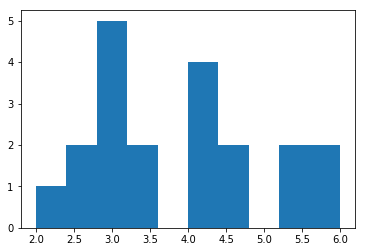

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt

np.random.seed(42)

count = 20

scores1, scores2 = np.random.randint(1,7, count), np.random.randint(1,7, count)
scores=np.array([scores1, scores2]).reshape((-1,2))
scores_means = np.mean(scores, axis=1)

plt.hist(scores_means)

_,_= get_mean_std(scores_means, True)

### 2.6

У статьи есть минимум 1 автор, следовательно минимальное значения для распределения это 1. От него до среднего значения, чтобы оно выглядело как нормальное должно быть 2 стандартных отклонения.
В первом случае и втором случаях от 1 до среднего меньше одного std.
Значит большинство значений лежит слева и далее вытянуто убывает вправо.
В третьем случае похоже на нормальное.
Четвёртый случай похож на первые 2.

К тому же средние данных выборок, хотя их всего 4, не образуют нормального распределения, а просто возрастают.

Попробуем сэмулировать эти 4 ситуации.

mean = 2.00, std = 1.40


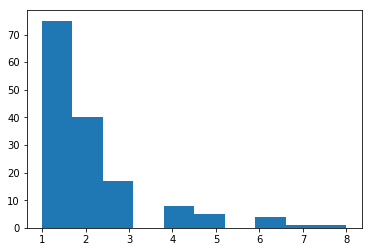

In [106]:
vals1 = np.concatenate([[1]*75, [2]*40, [3]*17, [4]*8, [5]*5, [6]*4, [7]*1, [8]*1])
_,_= get_mean_std(vals1, True)
len(vals1)

_ = plt.hist(vals1)

Первый случай показывает пример такого вида распределения.
Остальные 3 случая видимо похожи на него, просто возрастает доля статей с большим числом авторов
В четвёртом похоже на выброс, когда есть статья с аномально большим числом авторов:

mean = 4.90, std = 7.33


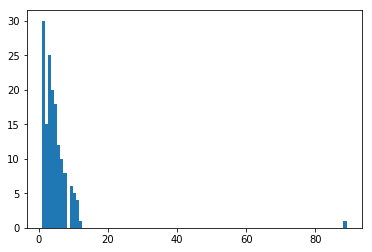

In [230]:
vals4 = np.concatenate([[1]*30, [2]*15, [3]*25, [4]*20,
                        [5]*18, [6]*12, [7]*10, [8]*8,
                       [9]*6, [10]*5, [11]*4, [12]*1,
                       [89]*1])
_,_= get_mean_std(vals4, True)
len(vals4)

_ = plt.hist(vals4, bins=100)